# MidTerm 1 - ML; KBTU

Okapova Akerke

15BD02047

okapova.akerke@gmail.com

### О задании

__Первая часть__ задания посвящена получению студентами навыков работы с библиотекой векторного вычисления numpy и библиотеками для построения графиков matplotlib/plotly. 

__Вторая часть__ задания посвящена работе с данными: их преобразованию в нужный формат и устранению проблем в них.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: Midterm-Username.ipynb, где Username — Ваша фамилия и имя на латинице именно в таком порядке. Приложите модули с кодом functions.py и functions_vectorized.py и заархивируйте в zip формат. Имя архива должно быть homework-practice-01-Username.zip

Далее отправьте этот файл на aa.pak83@gmail.com.


Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка:** ...

## Часть 1

_Задачи позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_

### Задачи 1-6
__(4.5 балла)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.25 балла__, векторизованная – в __0.5 балла__.

Для удобства проверки приложите в ячейке ниже ссылки на самые успешные посылки.


* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.
 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  
* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.
 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).
 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

__Замечание.__ Можно считать, что все указанные объекты непустые (к примеру, в __задаче 1__ на диагонали матрицы есть ненулевые элементы) и корректные.

In [329]:
import numpy as np

Посылка по невекторизованным функциям:

In [330]:
#Task1
def prod_non_zero_diag(x):
    """Compute product of nonzero elements from matrix diagonal.

    input:
    x -- 2-d numpy array
    output:
    product -- integer number


    Not vectorized implementation.
    """
    res = x[0][0]
    for i in range(min(len(x), len(x[0]))):
        if(x[i][i] != 0):
            res *= x[i][i]

    return res

print(prod_non_zero_diag(np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])))

3


In [331]:
#Task2
def are_multisets_equal(x, y):
    """Return True if both vectors create equal multisets.

    input:
    x, y -- 1-d numpy arrays
    output:
    True if multisets are equal, False otherwise -- boolean

    Not vectorized implementation.
    """
    x = sorted(x)
    y = sorted(y)
    flag = len(y) == len(x)
    sz = min(len(y), len(x))
    i = 0
    for i in range(sz):
        flag = flag & (x[i] == y[i])

    return flag

print(are_multisets_equal(np.array([1, 1, 2, 5, 8]), np.array([4, 2, 1, 2])))

False


In [332]:
#Task3
def max_after_zero(x):
    """Find max element after zero in array.

    input:
    x -- 1-d numpy array
    output:
    maximum element after zero -- integer number

    Not vectorized implementation.
    """
    sz = len(x)
    i = 0
    mx = -1e10
    for i in range(sz - 1):
        if(x[i] == 0):
            mx = max(mx, x[i + 1])

    return mx

print(max_after_zero(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])))

5


In [333]:
#Task4
from skimage.io import imread, imshow

img = imread('img.png') 
cfs = np.array([0.299, 0.587, 0.114])

def convert_image(img, coefs):  
    """Sum up image channels with weights from coefs array

    input:
    img -- 3-d numpy array (H x W x 3)
    coefs -- 1-d numpy array (length 3)
    output:
    img -- 2-d numpy array

    Vectorized implementation.
    """
    
    img_gray = [[0 for w in range(len(img[0]))] for h in range(len(img))]
    for w in range(len(img)):
        for h in range(len(img[0])):
            img_gray[w][h] = 1 / 3 * (
                  img[w][h][0] * coefs[0] / 255 
                + img[w][h][1] * coefs[1] / 255  
                + img[w][h][2] * coefs[2] / 255)
    
    return img_gray

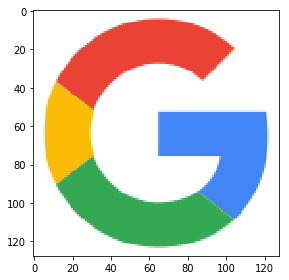

In [334]:
imshow(img)

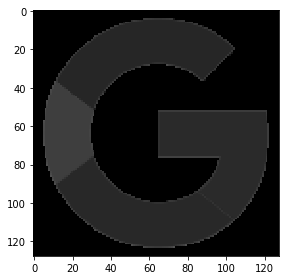

In [335]:
imshow(np.array(convert_image(img, cfs)))

In [336]:
#Task5
def run_length_encoding(x):
    """Make run-length encoding.

    input:
    x -- 1-d numpy array
    output:
    elements, counters -- integer iterables

    Vectorized implementation.
    """
    cnts = {}
    for num in x:
        cnts[num] = 0
    for num in x:
        cnts[num] = cnts[num] + 1

    return list(set(x)), list(cnts.values())

print(run_length_encoding(np.array([2, 2, 2, 3, 3, 3, 5])))

([2, 3, 5], [3, 3, 1])


In [337]:
#Task6
from scipy.spatial.distance import cdist

x = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
y = [[10, 11, 12], [13, 14, 15], [16, 17, 18], [19, 20, 21]]

cdist(x, y)

array([[15.58845727, 20.78460969, 25.98076211, 31.17691454],
       [10.39230485, 15.58845727, 20.78460969, 25.98076211],
       [ 5.19615242, 10.39230485, 15.58845727, 20.78460969]])

In [338]:
#учитывая, что размеры одинаковы

import math
def pairwise_distance(x, y):
    """Return pairwise object distance.

    input:
    x, y -- 2d numpy arrays
    output:
    distance array -- 2d numpy array

    Vctorized implementation.
    """
    result = []
    for arrx in x:
        cur = []
        for arry in y:
            res = 0
            for i in range(len(arry)):
                res = res + (arrx[i] - arry[i])**2
#             print(res)
            res = math.sqrt(res)
#             print(res)
            cur.append(res)
        result.append(list(cur))

    return list(result)

print(pairwise_distance(x, y))

[[15.588457268119896, 20.784609690826528, 25.98076211353316, 31.176914536239792], [10.392304845413264, 15.588457268119896, 20.784609690826528, 25.98076211353316], [5.196152422706632, 10.392304845413264, 15.588457268119896, 20.784609690826528]]


Посылка по векторизованным функциям:

In [339]:
#Task1
def prod_non_zero_diag_vect(x):
    """Compute product of nonzero elements from matrix diagonal.

    input:
    x -- 2-d numpy array
    output:
    product -- integer number


    Vectorized implementation.
    """

    # SOURCE: http://www.cyberforum.ru/python/thread1344307.html
    diag = x.diagonal()
    diag_no_0 = diag[diag != 0]
    mult = np.multiply.reduce(diag_no_0)
    
    return mult

print(prod_non_zero_diag(np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])))

3


In [340]:
#Task2
def are_multisets_equal_vect(x, y):
    """Return True if both vectors create equal multisets.

    input:
    x, y -- 1-d numpy arrays
    output:
    True if multisets are equal, False otherwise -- boolean

    Vectorized implementation.
    """
    x = np.sort(x, axis=None)
    y = np.sort(y, axis=None)
    z = x == y
    return np.all(z)

print(are_multisets_equal(np.array([1, 2, 2, 4]), np.array([4, 2, 1, 2])))

True


In [341]:
#Task3
def max_after_zero_vect(x):
    """Find max element after zero in array.

    input:
    x -- 1-d numpy array
    output:
    maximum element after zero -- integer number

    Vectorized implementation.
    """
    # SOURCE: https://stackoverflow.com/questions/4588628/find-indices-of-elements-equal-to-zero-in-a-numpy-array
    sz = np.size(x)
#     print(sz)
    y = np.where(x == 0)[0]
    y = y + 1
    y = y[(y < sz)]
    z = x[y]
#     print(x)
#     print(y)
    if len(z) == 0:
        return -1e10
    else:
        return max(z)

print(max_after_zero(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])))

5


In [342]:
#Task4
def convert_image_vect(img, coefs):
    """Sum up image channels with weights from coefs array

    input:
    img -- 3-d numpy array (H x W x 3)
    coefs -- 1-d numpy array (length 3)
    output:
    img -- 2-d numpy array

    Vectorized implementation.
    """

    return 1 / 3 * (img[:, :, 0] * coefs[0] / 255 + 
                    img[:, :, 1] * coefs[1] / 255 + 
                    img[:, :, 2] * coefs[2] / 255)

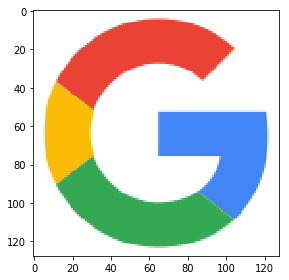

In [343]:
imshow(img)

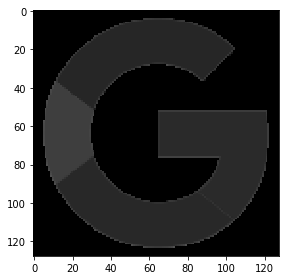

In [344]:
imshow(convert_image_vect(img, cfs))

In [345]:
#Task5
def run_length_encoding_vect(x):
    """Make run-length encoding.

    input:
    x -- 1-d numpy array
    output:
    elements, counters -- integer iterables

    Vectorized implementation.
    """
    return np.unique(x, return_counts=True)

print(run_length_encoding(np.array([2, 2, 2, 3, 3, 3, 5])))

([2, 3, 5], [3, 3, 1])


In [346]:
#Task6
def pairwise_distance_vect(x, y):
    """Return pairwise object distance.

    input:
    x, y -- 2d numpy arrays
    output:
    distance array -- 2d numpy array

    Vctorized implementation.
    """
    

    return cdist(x, y)

print(pairwise_distance(x, y))

[[15.588457268119896, 20.784609690826528, 25.98076211353316, 31.176914536239792], [10.392304845413264, 15.588457268119896, 20.784609690826528, 25.98076211353316], [5.196152422706632, 10.392304845413264, 15.588457268119896, 20.784609690826528]]


### Задача 7
__(1.5 балла)__  
Для каждой задачи сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib или plotly постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "`~Figure.add_axes`, `~.Figure.subplot` or "


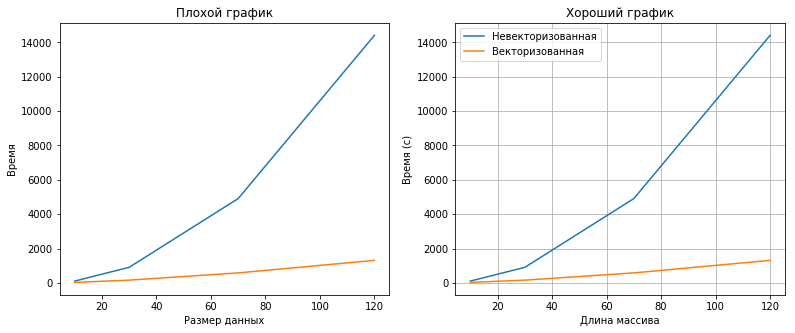

In [347]:
import matplotlib.pyplot as plt
import numpy as np

# %matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

In [348]:
import time
def plot_time(data_size, time_vectorized, time_non_vectorized, title):
    f, ax = plt.subplots(1, 1, figsize=(13, 5))
    ax.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax.set_title(title)
    ax.set_xlabel(u"Длина массива")
    ax.set_ylabel(u"Время (с)")
    ax.grid()
    ax.legend()

In [349]:
#Task1
n = 20
time_non_vectorized = np.zeros(n)
time_vectorized = np.zeros(n)
data_size = np.zeros(n)

for i in range(n):
    x = np.random.rand(10 * (i + 1), 50 * (i + 1))
    data_size[i] = x.size
    
    start_time = time.time()
    prod_non_zero_diag(x)
    time_non_vectorized[i] = time.time() - start_time
    
    start_time = time.time()
    prod_non_zero_diag_vect(x)
    time_vectorized[i] = time.time() - start_time

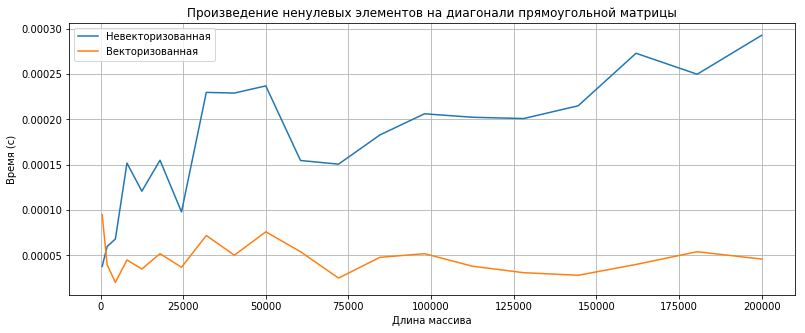

In [350]:
plot_time(data_size, time_vectorized, time_non_vectorized, 
          u"Произведение ненулевых элементов на диагонали прямоугольной матрицы")

In [351]:
#Task2
n = 20
time_non_vectorized = np.zeros(n)
time_vectorized = np.zeros(n)
data_size = np.zeros(n)

for i in range(n):
    x = np.random.rand(50 * (i + 1))
    y = np.random.rand(50 * (i + 1))
    data_size[i] = x.size 
    
    start_time = time.time()
    are_multisets_equal(x, y)
    time_non_vectorized[i] = time.time() - start_time
    
    start_time = time.time()
    are_multisets_equal_vect(x, y)
    time_vectorized[i] = time.time() - start_time

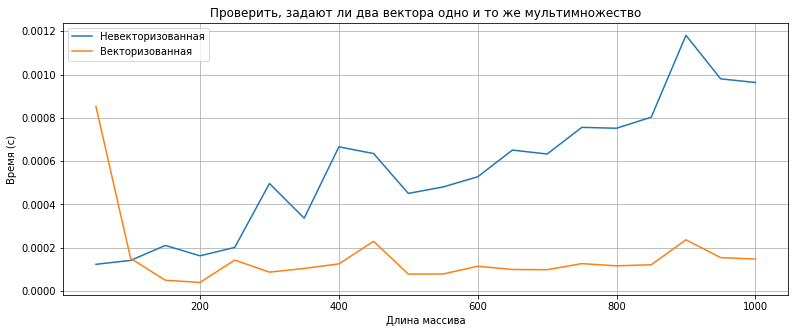

In [352]:
plot_time(data_size, time_vectorized, time_non_vectorized, 
          u"Проверить, задают ли два вектора одно и то же мультимножество")

In [353]:
#Task3
n = 20
time_non_vectorized = np.zeros(n)
time_vectorized = np.zeros(n)
data_size = np.zeros(n)

for i in range(n):
    x = np.random.rand(50 * (i + 1))
    data_size[i] = x.size
    
    start_time = time.time()
    max_after_zero(x)
    time_non_vectorized[i] = time.time() - start_time
    
    start_time = time.time()
    max_after_zero_vect(x)
    time_vectorized[i] = time.time() - start_time

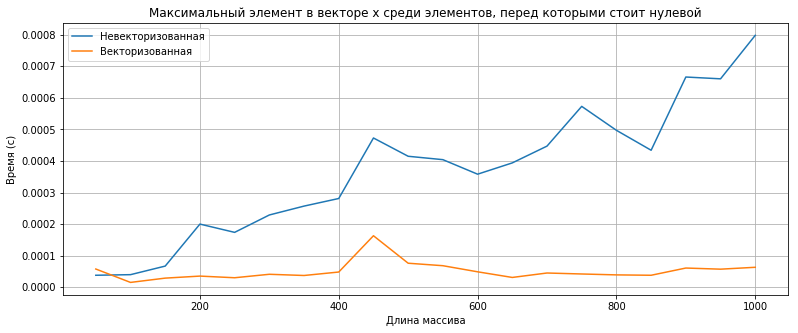

In [354]:
plot_time(data_size, time_vectorized, time_non_vectorized, 
          u"Максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой")

In [355]:
#Task4
n = 20
time_non_vectorized = np.zeros(n)
time_vectorized = np.zeros(n)
data_size = np.zeros(n)

cfs = np.array([0.299, 0.587, 0.114])

for i in range(n):
    x = np.random.rand(30 * (i + 1), 50 * (i + 1), 3)
    data_size[i] = x.size
    
    start_time = time.time()
    convert_image(x, cfs)
    time_non_vectorized[i] = time.time() - start_time
    
    start_time = time.time()
    convert_image_vect(x, cfs)
    time_vectorized[i] = time.time() - start_time

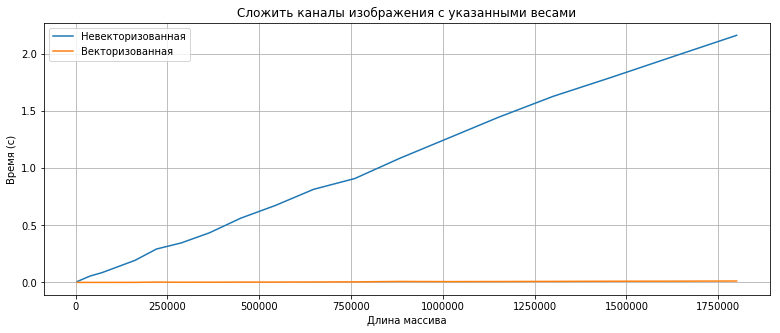

In [356]:
plot_time(data_size, time_vectorized, time_non_vectorized, 
          u"Сложить каналы изображения с указанными весами")

In [357]:
#Task5
n = 20
time_non_vectorized = np.zeros(n)
time_vectorized = np.zeros(n)
data_size = np.zeros(n)

for i in range(n):
    x = np.random.rand(50 * (i + 1))
    data_size[i] = x.size
    
    start_time = time.time()
    run_length_encoding(x)
    time_non_vectorized[i] = time.time() - start_time
    
    start_time = time.time()
    run_length_encoding_vect(x)
    time_vectorized[i] = time.time() - start_time

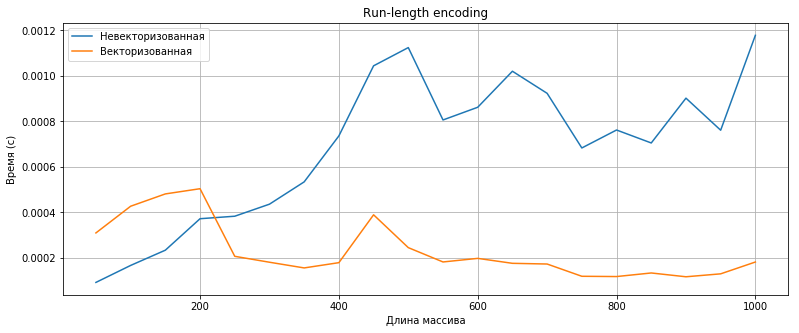

In [358]:
plot_time(data_size, time_vectorized, time_non_vectorized, 
          u"Run-length encoding")

In [359]:
#Task6
n = 20
time_non_vectorized = np.zeros(n)
time_vectorized = np.zeros(n)
data_size = np.zeros(n)

for i in range(n):
    x = np.random.rand(5 * (i + 1), 5 * (i + 1))
    y = np.random.rand(5 * (i + 1), 5 * (i + 1))
    data_size[i] = x.size
    
    start_time = time.time()
    pairwise_distance(x, y)
    time_non_vectorized[i] = time.time() - start_time
    
    start_time = time.time()
    pairwise_distance_vect(x, y)
    time_vectorized[i] = time.time() - start_time

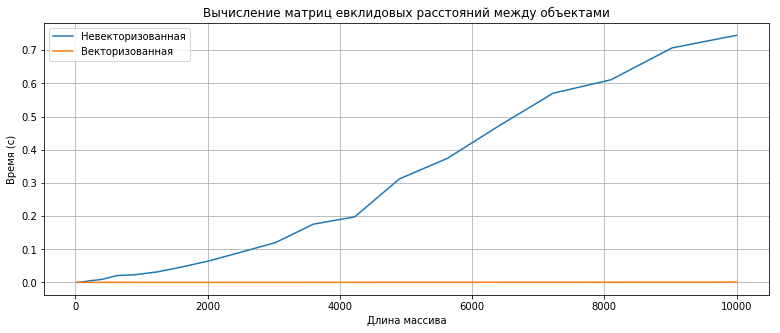

In [360]:
plot_time(data_size, time_vectorized, time_non_vectorized, 
          u"Вычисление матриц евклидовых расстояний между объектами")

## Часть 2

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

**Внимание!** Хотя исходные данные для этого задания можно найти в интернете, делать это запрещается. Вся необходимая информация о данных содержится в задании.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных. В качестве алгоритма мы будем использовать линейную регрессию, ак ачество будем измерять по метрике RMSE.

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

### Задача 1: пропуски в данных 
__(0.5 балла)__

Загрузите таблицу data.csv. Проверьте, есть ли в ней пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [361]:
import numpy as np
import pandas as pd
data = pd.read_csv("data.csv")
data.head(10)

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,10
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,10
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,10
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,-10
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,10
5,17,2,4,1,2,4,3,2.0,1.0,1.0,5,0,1,1,1,1,10
6,15,1,1,3,2,4,2,1.0,1.0,2.0,2,0,0,0,1,1,10
7,15,3,3,1,4,4,3,3.0,1.0,1.0,4,0,1,0,0,1,10
8,19,1,1,3,1,4,4,4.0,3.0,3.0,5,1,0,0,1,1,11
9,17,1,1,1,3,4,3,2.0,1.0,2.0,4,0,1,1,1,1,10


In [362]:
data.isnull().values.any()

True

In [363]:
data.columns[data.isnull().any()].tolist()

['goout', 'Dalc', 'Walc']

In [364]:
data[data.isnull().any(axis=1)].head(10)

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures
34,18,1,1,2,3,5,3,2.0,1.0,NaN,4,0,1,1,1,1,10
51,18,4,3,1,2,3,1,NaN,1.0,3.0,2,0,1,0,1,1,10
73,18,2,2,1,3,4,3,3.0,NaN,2.0,2,0,1,0,1,1,10
78,17,3,3,1,1,4,4,3.0,NaN,3.0,5,1,1,0,1,1,10
89,16,1,2,2,2,4,3,3.0,1.0,NaN,5,1,0,0,1,1,10
141,18,4,4,1,1,5,4,5.0,1.0,NaN,5,1,1,1,1,1,10
234,18,4,4,2,2,4,3,4.0,NaN,2.0,4,0,0,0,1,1,10
285,16,3,1,1,4,4,3,3.0,NaN,2.0,5,0,1,0,1,1,10
309,16,3,1,1,2,2,3,3.0,NaN,2.0,4,0,1,0,0,1,10
398,17,4,4,1,3,5,4,4.0,1.0,NaN,4,0,1,0,1,1,10


In [365]:
data.fillna(data.mean(), inplace=True)
data.loc[[34, 51, 73, 78, 89, 141, 234, 285, 309, 398]]

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures
34,18,1,1,2,3,5,3,2.000000,1.000000,2.286159,4,0,1,1,1,1,10
51,18,4,3,1,2,3,1,3.186728,1.000000,3.000000,2,0,1,0,1,1,10
73,18,2,2,1,3,4,3,3.000000,1.497653,2.000000,2,0,1,0,1,1,10
78,17,3,3,1,1,4,4,3.000000,1.497653,3.000000,5,1,1,0,1,1,10
89,16,1,2,2,2,4,3,3.000000,1.000000,2.286159,5,1,0,0,1,1,10
141,18,4,4,1,1,5,4,5.000000,1.000000,2.286159,5,1,1,1,1,1,10
234,18,4,4,2,2,4,3,4.000000,1.497653,2.000000,4,0,0,0,1,1,10
285,16,3,1,1,4,4,3,3.000000,1.497653,2.000000,5,0,1,0,1,1,10
309,16,3,1,1,2,2,3,3.000000,1.497653,2.000000,4,0,1,0,0,1,10
398,17,4,4,1,3,5,4,4.000000,1.000000,2.286159,4,0,1,0,1,1,10


In [366]:
data.isnull().values.any()

False

### Задача 2: кросс-валидация для исходных данных
__(0.5 балла)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [367]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score
scores = pd.read_csv("scores.csv")
scores.head(10)

,70.0
0,85.0
1,45.0
2,55.0
3,55.0
4,80.0
5,70.0
6,50.0
7,50.0
8,50.0
9,55.0


In [368]:
data.shape, scores.shape

((649, 17), (648, 1))

In [369]:
scores.index += 1
scores.loc[0] = [70.0]
scores = scores.sort_index()
scores.rename(columns = {'70.0':'score'}, inplace=True)
scores.head(10)

,score
0,70.0
1,85.0
2,45.0
3,55.0
4,55.0
5,80.0
6,70.0
7,50.0
8,50.0
9,50.0


In [370]:
data.shape, scores.shape

((649, 17), (649, 1))

In [371]:
linear = LinearRegression()
old_score = cross_val_score(linear, data, y=scores)
print(old_score)

[0.1538997  0.1400246  0.11817804]


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


### Задача 3: полные данные
__(1 балл)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

In [372]:
attendance = pd.read_csv('attendance.csv', sep=';')
attendance.fillna('-', inplace=True)
attendance.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,+,+,+,+,+,+,+,-,-,+,...,+,+,+,+,-,+,+,-,+,+
1,+,-,+,+,+,+,+,+,+,+,...,+,+,+,+,+,+,+,+,+,+
2,+,+,+,+,+,+,+,+,+,+,...,+,+,+,+,+,+,+,+,+,+
3,+,+,-,-,+,+,+,+,-,-,...,+,+,+,+,+,+,+,-,-,+
4,+,+,+,+,+,+,+,+,+,+,...,+,+,+,+,+,+,+,+,+,+


In [373]:
attendance_count = pd.Series((attendance == '+').sum(axis=1), name='attendance_count')

In [374]:
school_support = pd.read_csv('school_support.txt', names = ['index'])
indexs = school_support['index'].values
school_support = pd.Series(1, index=indexs, name='school_support')
data = pd.concat([data, school_support, attendance_count], axis=1)
data['school_support'].fillna(0, inplace=True)
data.head(10)

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures,school_support,attendance_count
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,10,0.0,26
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,10,0.0,30
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,10,0.0,32
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,-10,0.0,22
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,10,0.0,32
5,17,2,4,1,2,4,3,2.0,1.0,1.0,5,0,1,1,1,1,10,0.0,24
6,15,1,1,3,2,4,2,1.0,1.0,2.0,2,0,0,0,1,1,10,0.0,32
7,15,3,3,1,4,4,3,3.0,1.0,1.0,4,0,1,0,0,1,10,1.0,22
8,19,1,1,3,1,4,4,4.0,3.0,3.0,5,1,0,0,1,1,11,0.0,28
9,17,1,1,1,3,4,3,2.0,1.0,2.0,4,0,1,1,1,1,10,0.0,22


### Задача 4: сломанный признак
__(0.5 балла)__

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [375]:
np.unique(data['plans_universitypast_failures'])

array([-13, -12, -11, -10,  10,  11,  12,  13])

In [376]:
plans_university = pd.Series(np.round(data['plans_universitypast_failures'] / 10), name='plans_university')
past_failures = pd.Series(abs(data['plans_universitypast_failures']) - 10, name='past_failures')
data = pd.concat([data, plans_university, past_failures], axis=1)
data.drop(['plans_universitypast_failures'], axis=1, inplace=True)
data.head(15)

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,school_support,attendance_count,plans_university,past_failures
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,0.0,26,1.0,0
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,0.0,30,1.0,0
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,0.0,32,1.0,0
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,0.0,22,-1.0,0
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,0.0,32,1.0,0
5,17,2,4,1,2,4,3,2.0,1.0,1.0,5,0,1,1,1,1,0.0,24,1.0,0
6,15,1,1,3,2,4,2,1.0,1.0,2.0,2,0,0,0,1,1,0.0,32,1.0,0
7,15,3,3,1,4,4,3,3.0,1.0,1.0,4,0,1,0,0,1,1.0,22,1.0,0
8,19,1,1,3,1,4,4,4.0,3.0,3.0,5,1,0,0,1,1,0.0,28,1.0,1
9,17,1,1,1,3,4,3,2.0,1.0,2.0,4,0,1,1,1,1,0.0,22,1.0,0


### Задача 5: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность.

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12513cc88>,
      dtype=object)

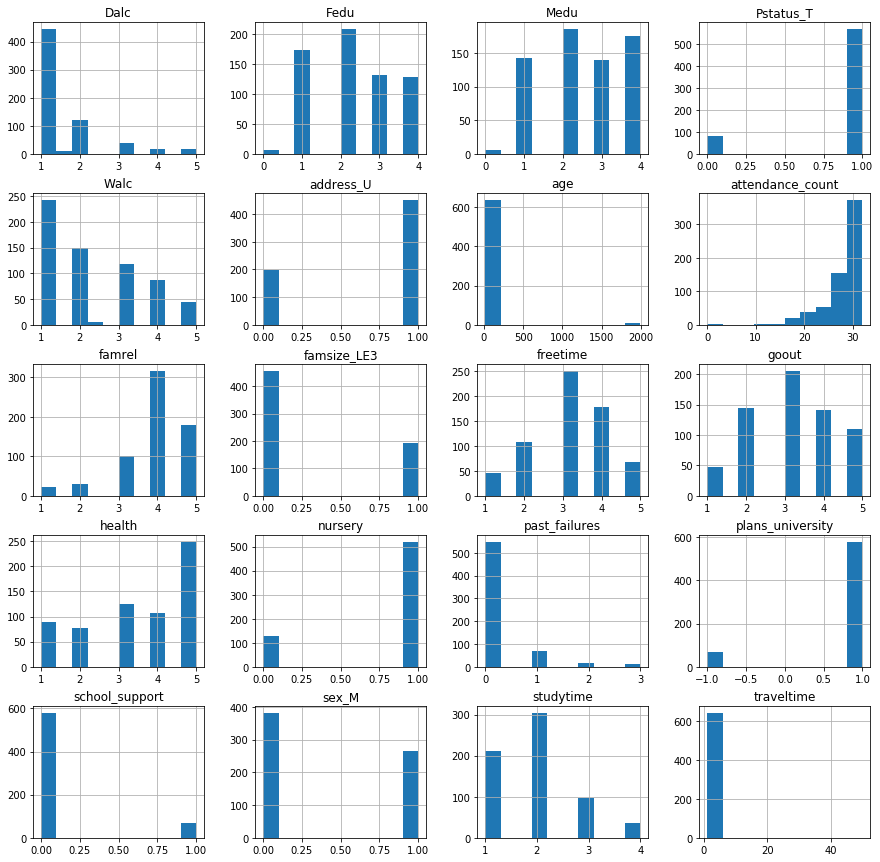

In [377]:
data.hist(figsize=(15, 15))

Другой простой способ найти выбросы &mdash; сделать предсказание на всех объектах и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены в прошлом пункте; для проверки &mdash; в обоих пунктах в сумме нужно исправить 3 проблемы.*

In [378]:
data['age'] = data['age'].apply(lambda x: x if x < 1000 else 2006 - x)
data.head()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,school_support,attendance_count,plans_university,past_failures
0,16,4,4,1,2,5,4,4.0,1.0,2.0,5,1,1,0,1,1,0.0,26,1.0,0
1,17,4,4,1,1,5,3,4.0,1.0,2.0,5,0,1,0,1,1,0.0,30,1.0,0
2,16,1,1,2,1,4,5,5.0,2.0,4.0,5,1,0,1,1,1,0.0,32,1.0,0
3,18,1,2,2,1,3,4,4.0,2.0,4.0,4,1,1,0,1,0,0.0,22,-1.0,0
4,17,2,1,2,2,4,2,5.0,1.0,2.0,5,0,0,0,1,1,0.0,32,1.0,0


In [379]:
data.tail(15)

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,school_support,attendance_count,plans_university,past_failures
634,15,4,4,2,2,4,4,4.0,2.0,3.0,5,0,1,0,1,1,0.0,28,1.0,0
635,18,2,2,1,2,3,2,3.0,1.0,1.0,5,0,0,0,1,1,1.0,28,1.0,0
636,16,4,4,1,2,4,3,1.0,1.0,1.0,3,1,1,0,1,1,0.0,32,1.0,0
637,18,3,2,3,1,4,4,1.0,3.0,4.0,5,1,0,1,1,0,0.0,28,1.0,0
638,15,4,4,1,4,1,3,3.0,5.0,5.0,3,1,1,0,0,0,0.0,32,1.0,0
639,17,2,1,1,1,4,4,2.0,2.0,4.0,5,1,0,0,1,0,0.0,32,1.0,0
640,15,2,2,1,1,4,3,1.0,1.0,1.0,2,0,0,0,1,1,1.0,24,1.0,0
641,17,1,4,4,1,5,5,4.0,1.0,1.0,5,0,0,1,0,1,0.0,18,1.0,1
642,17,3,2,1,2,4,5,4.0,1.0,2.0,5,0,0,0,1,1,0.0,32,1.0,1
643,15,3,3,2,1,5,4,4.0,2.0,3.0,5,0,0,0,1,1,0.0,28,1.0,0


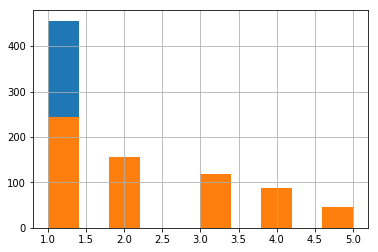

In [318]:
data['Dalc'].hist()
data['Walc'].hist()

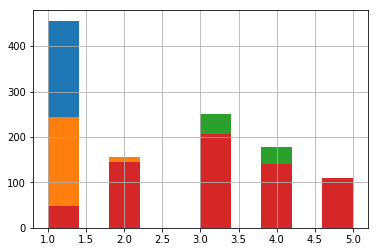

In [317]:
data['Dalc'] = data['Dalc'].apply(lambda x: np.round(x))
data['Walc'] = data['Walc'].apply(lambda x: np.round(x))
data['Dalc'].hist()
data['Walc'].hist()

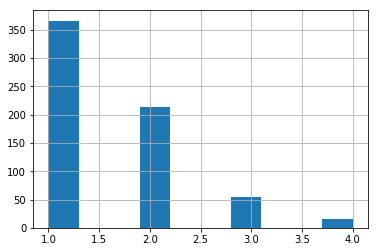

In [324]:
def time_normalize(x):
    if x <= 0:
        return 1
    elif x > 4:
        if x < 15:
            return 1
        elif x < 30:
            return 2
        elif x < 60:
            return 3
        else:
            return 4
    return x

data['traveltime'] = data['traveltime'].apply(time_normalize)
data['traveltime'].hist()

### Финальное предсказание

Проведите предсказание еще раз и сравните результат с исходным.

In [325]:
new_score = cross_val_score(linear, data, y=scores)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [326]:
new_score

array([0.2528722 , 0.19534916, 0.17805524])

In [327]:
old_score

array([0.1538997 , 0.1400246 , 0.11817804])

In [328]:
(new_score - old_score).mean()

0.07139142133516863